In [1]:
import numpy as np
import h5py
from scipy.interpolate import interp1d
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import gridspec
plt.rc('text', usetex=True)

import glob
import os
import pickle

In [2]:
def load_pkl(filename):
    try:
        import cPickle as pickle
    except:
        warnings.warn("## cPickle is not available!!")
        import pickle

    if os.path.isfile(filename):
        pklFile = open(filename, 'rb')
        data = pickle.load(pklFile)
        pklFile.close()

        return data
    else:
        warnings.warn("## Can not find %s, return None" % filename)
        return None
    

#find max number of sma's
#use as number of columns
#assign nans for those without
#nanmedian

def find_smas(isos):
    smas=[]

    for iso in isos:

        if len(iso['sma']) > len(smas):
            smas=iso['sma']

    return smas

In [3]:
################################################################################
#HSC
hsc_data='/Users/fardila/Documents/Github/HSC_vs_hydro/Data/HSC/'
hscMedProf_114_116 = np.load(hsc_data+'s16a_wide2_massive_logm100_11.4_11.6.medprof.npy')[0]
hscMedProf_116_118 = np.load(hsc_data+'s16a_wide2_massive_logm100_11.6_11.8.medprof.npy')[0]
hscMedProf_118_120 = np.load(hsc_data+'s16a_wide2_massive_logm100_11.8_12.0.medprof.npy')[0]

# Universal RSMA array
RSMA_COMMON = np.arange(0.4, 4.2, 0.01)

# These are the median stellar mass density profiles for HSC galaxies at 0.3 < z < 0.5
# in three mass bins
# rm0 : 11.4 < logM_100kpc < 11.6
# rm1 : 11.6 < logM_100kpc < 11.8
# rm2 : 11.8 < logM_100kpc < 12.0
# They are on a common radius array, and we use (r ** 0.25) as radius

In [38]:
#open pickels
illustris_masses_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/Illustris_masses_quick.pkl'
illustris_isos_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/Illustris_isos_quick.pkl'

tng_masses_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_masses_quick.pkl'
tng_isos_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_isos_quick.pkl'

tng_isos_cenICL_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_isos_cen+icl_quick.pkl'

tng300_isos_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG300_isos_cen_quick.pkl'

def open_pkl(file_name):
    pkl = open(file_name,'rb')
    array = pickle.load(pkl)
    pkl.close()  
    return array

illustris_masses = open_pkl(illustris_masses_file)
tng_masses = open_pkl(tng_masses_file)
illustris_isos = open_pkl(illustris_isos_file)
tng_isos = open_pkl(tng_isos_file)

tng_isos_cenICL = open_pkl(tng_isos_cenICL_file)

tng300_isos = np.array(open_pkl(tng300_isos_file))
tng300_mask = ~np.array([iso == None for iso in tng300_isos]) #some (~10) have None because no object was detected at the high threshold
tng300_isos = tng300_isos[tng300_mask]

In [5]:
pixel_scale=2.*800./300 #kpc/pixel
print 'pixel scale: ', pixel_scale

pixel scale:  5.33333333333


In [6]:
nbin=150
def get_median_profile(isos, pixel_scale, quantity = 'intens', rmin=0.05, rmax=4.7, nbin=nbin, R200=None):
    """Get the median profiles."""
    sma_common = np.linspace(rmin, rmax, nbin)
    
    if quantity == 'intens':
        if R200 is not None:
            sma_common = np.linspace(-2, 1, nbin)
            mu = np.nanmedian(np.stack([interp1d(np.log10((gal['sma'] * pixel_scale)/r200), 
                                                   np.log10(gal[quantity] / (pixel_scale ** 2)),
                                                   bounds_error=False, 
                                                   fill_value=np.nan, 
                                                   kind='slinear')(sma_common) 
                                   for gal,r200 in zip(isos,R200)]), axis=0)            
        else:
            mu = np.nanmedian(np.stack([interp1d((gal['sma'] * pixel_scale) ** 0.25, 
                                                   np.log10(gal[quantity] / (pixel_scale ** 2)),
                                                   bounds_error=False, 
                                                   fill_value=np.nan, 
                                                   kind='slinear')(sma_common) 
                                   for gal in isos]), axis=0)
    elif quantity == 'growth_ori':
        mu = np.nanmedian(np.stack([interp1d((gal['sma'] * pixel_scale) ** 0.25, 
                                               np.log10(gal[quantity]),
                                               bounds_error=False, 
                                               fill_value=np.nan, 
                                               kind='slinear')(sma_common) 
                               for gal in isos]), axis=0)

    return sma_common, mu

# TNG 

# plot to large radii


/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in log10


235


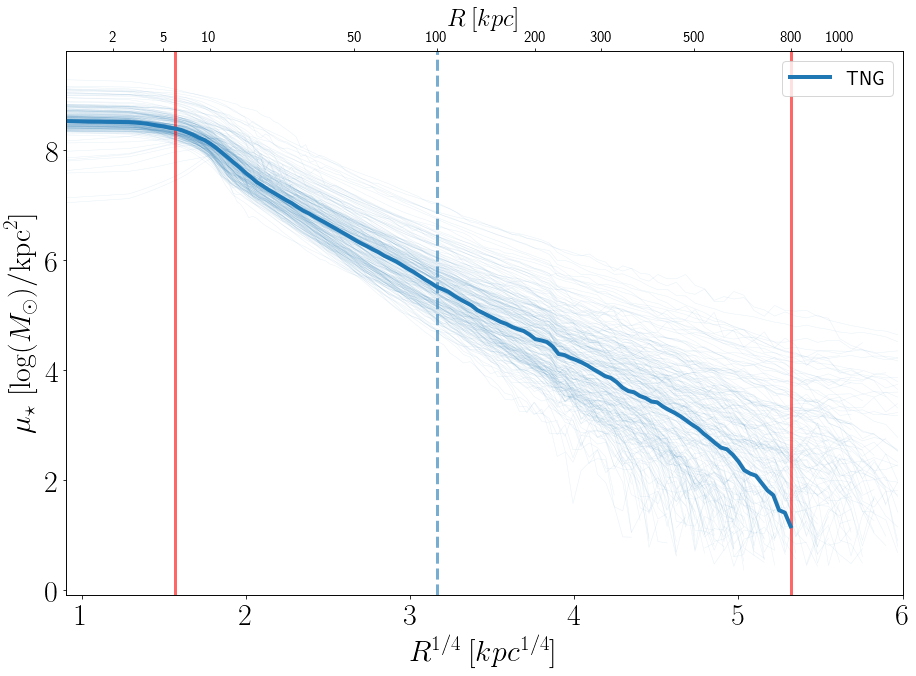

In [7]:
ngals1=0

#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()


######################################################################################################################
# plot
######################################################################################################################
#hsc
# ax1.plot(RSMA_COMMON, hscMedProf_116_118, linestyle='--', linewidth=4.0, c='k',
#          alpha=1, zorder=8, label='HSC')
# ax2.plot(RSMA_COMMON, hscMedProf_118_120, linestyle='--', linewidth=4.0, c='k',
#          alpha=1, zorder=8, label='HSC')
  


for iso in tng_isos:   
    

        ngals1+=1

        #tng_isos1.append(iso)

        ax1.plot((iso['sma'] * pixel_scale) ** 0.25,
             np.log10(iso['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0) , linewidth=0.5, c=u'#1f77b4',
                 alpha=0.1, label='_nolegend_', zorder=1)
                 #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))


## median profiles for tng
median_sma1, median_mu1 = get_median_profile(tng_isos, pixel_scale = pixel_scale, rmax=800.**0.25)

ax1.plot(median_sma1, median_mu1+ np.log10(0.7 ** 2.0), linewidth=4.0, c=u'#1f77b4', alpha=1, label='TNG', zorder=8)


print ngals1


######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
ax1.set_xlim(0.9, 6)
#ax1.set_ylim(-2, 10)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25, 500**0.25, 800**0.25, 1000**0.25])
ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300, 500, 800, 1000])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_tng.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in log10


2703


/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:49: RuntimeWarning: divide by zero encountered in log10


235


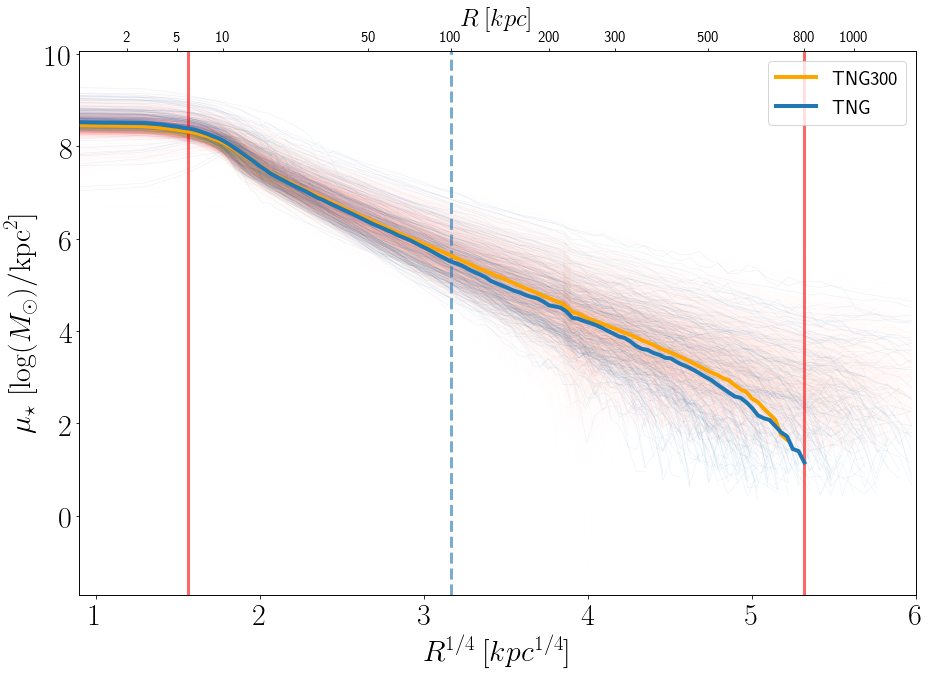

In [56]:
ngals1=0

#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()


######################################################################################################################
# plot
######################################################################################################################
#hsc
# ax1.plot(RSMA_COMMON, hscMedProf_116_118, linestyle='--', linewidth=4.0, c='k',
#          alpha=1, zorder=8, label='HSC')
# ax2.plot(RSMA_COMMON, hscMedProf_118_120, linestyle='--', linewidth=4.0, c='k',
#          alpha=1, zorder=8, label='HSC')
  


for iso in tng300_isos:   
    

        ngals1+=1

        #tng_isos1.append(iso)

        ax1.plot((iso['sma'] * pixel_scale) ** 0.25,
             np.log10(iso['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0) , linewidth=0.05, c='orange',
                 alpha=0.1, label='_nolegend_', zorder=1)
                 #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))


## median profiles for tng
median_sma1, median_mu1 = get_median_profile(tng300_isos, pixel_scale = pixel_scale, rmax=800.**0.25)

ax1.plot(median_sma1, median_mu1+ np.log10(0.7 ** 2.0), linewidth=4.0, c='orange', alpha=1, label='TNG300', zorder=8)


print ngals1
ngals1 =0

for iso in tng_isos:   
    

        ngals1+=1

        #tng_isos1.append(iso)

        ax1.plot((iso['sma'] * pixel_scale) ** 0.25,
             np.log10(iso['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0) , linewidth=0.5, c=u'#1f77b4',
                 alpha=0.1, label='_nolegend_', zorder=1)
                 #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))


## median profiles for tng
median_sma1, median_mu1 = get_median_profile(tng_isos, pixel_scale = pixel_scale, rmax=800.**0.25)

ax1.plot(median_sma1, median_mu1+ np.log10(0.7 ** 2.0), linewidth=4.0, c=u'#1f77b4', alpha=1, label='TNG', zorder=8)


print ngals1


######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
ax1.set_xlim(0.9, 6)
#ax1.set_ylim(-2, 10)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25, 500**0.25, 800**0.25, 1000**0.25])
ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300, 500, 800, 1000])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_tng.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

## as a function of R200 

In [17]:
TNG_file_quick = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/galaxies_stellarmaps_tng75_11.2.hdf5'
f = h5py.File(TNG_file_quick, 'r')
M200 = np.array(f['catgrp_Group_M_Crit200']) # in solar masses
f.close()

In [39]:
tng300_M200 = np.load('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/tng300_M200_lr_072.npz')['arr_0']
tng300_M200 = tng300_M200[tng300_mask]

In [19]:
from astropy.cosmology import Planck13 as cosmo
from astropy import units as u
from __future__ import division

rho_crit = cosmo.critical_density(0.4).to(u.solMass/u.kpc**3).value
R200 = (M200*(3/4) / (np.pi) / (200*rho_crit) ) **(1/3) #in kpc

TNG300_R200 = (tng300_M200*(3/4) / (np.pi) / (200*rho_crit) ) **(1/3) #in kpc

In [11]:
R200

array([985.71521066, 960.46739259, 924.64881472, 940.745798  ,
       792.31189912, 847.99437186, 812.72453381, 850.52397066,
       799.60960868, 794.09788485, 719.61205943, 760.56585307,
       746.97154832, 641.12914731, 718.66363897, 536.80911359,
       669.89379349, 563.5232215 , 646.65654539, 559.37950543,
       651.17779388, 639.32923482, 621.61232971, 463.72730981,
       625.3983908 , 594.14856274, 603.66741777, 589.08922634,
       621.36717097, 568.4315261 , 592.93394452, 594.49405511,
       583.82327573, 597.8759439 , 543.06747391, 569.12491139,
       571.36258084, 531.42620405, 568.01150932, 564.89997414,
       505.582472  , 561.63629425, 411.8625107 , 569.55097017,
       556.66334304, 472.80765396, 551.36254864, 548.9636746 ,
       546.09626984, 543.23357159, 538.55644395, 539.2343534 ,
       516.63792652, 473.05539799, 465.09689302, 477.62764772,
       441.58124949, 517.65210671, 525.32036305, 478.95854054,
       487.01855555, 448.48044142, 471.34784254, 465.79

caveat: some R200 are greater than the size of the map

/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10


235


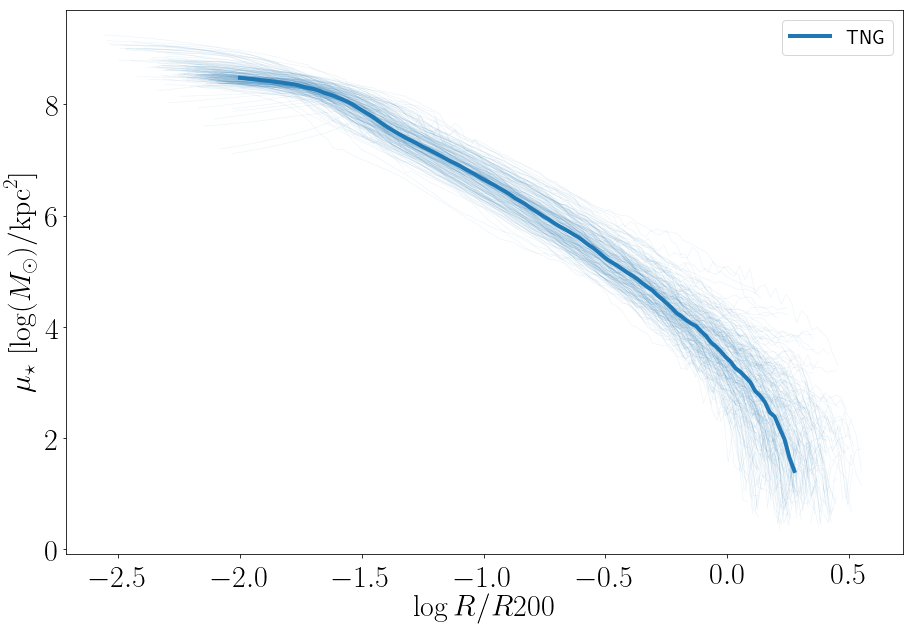

In [50]:
ngals1=0

#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()


######################################################################################################################
# plot
######################################################################################################################
for iso in tng_isos:   
    
        r200 = R200[ngals1]
        ngals1+=1

        #tng_isos1.append(iso)

        ax1.plot(np.log10((iso['sma'] * pixel_scale)/r200),
             np.log10(iso['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0) , linewidth=0.5, c=u'#1f77b4', alpha=0.1, 
                 label='_nolegend_', zorder=1)
                 #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))


## median profiles for tng
median_sma1, median_mu1 = get_median_profile(tng_isos, pixel_scale = pixel_scale, rmax=800.**0.25, R200=R200)

ax1.plot(median_sma1, median_mu1+ np.log10(0.7 ** 2.0), linewidth=4.0, c=u'#1f77b4', alpha=1, label='TNG', zorder=8)


print ngals1


######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
# ax1.set_xlim(0.9, 6)
#ax1.set_ylim(-2, 10)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
# x1, x2 = ax1.get_xlim()
# ax1_twin = ax1.twiny()
# ax1_twin.set_xlim(x1, x2)
# ax1_twin.figure.canvas.draw()
# ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25, 500**0.25, 800**0.25, 1000**0.25])
# ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300, 500, 800, 1000])
# ax1_twin.tick_params(axis='both', which='major', labelsize=15)
# ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
# ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_xlabel(r'$\log {R/R200} $', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
# ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
# ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
# ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_tng.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

## TNG300


/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10


2703


/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:46: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:47: RuntimeWarning: divide by zero encountered in log10


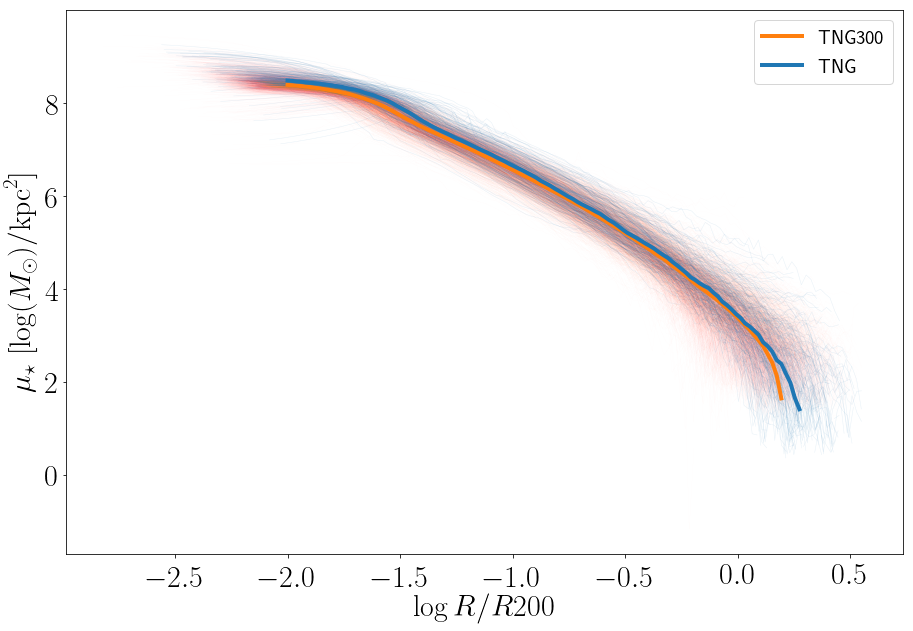

In [52]:
ngals1=0

#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()


######################################################################################################################
# plot
######################################################################################################################
for iso in tng300_isos:  

    
        r200 = TNG300_R200[ngals1]
        ngals1+=1

        #tng_isos1.append(iso)

        ax1.plot(np.log10((iso['sma'] * pixel_scale)/r200),
             np.log10(iso['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0) , linewidth=0.05, c=u'#ff7f0e',
                 alpha=0.1, 
                 label='_nolegend_', zorder=1)
                 #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))


## median profiles for tng
median_sma1, median_mu1 = get_median_profile(tng300_isos, pixel_scale = pixel_scale, rmax=800.**0.25,
                                             R200=TNG300_R200)

ax1.plot(median_sma1, median_mu1+ np.log10(0.7 ** 2.0), linewidth=4.0, c=u'#ff7f0e', alpha=1, label='TNG300',
         zorder=8)


print ngals1
ngals1 = 0
######################################################################################################################
# plot
######################################################################################################################
for iso in tng_isos:   
    
        r200 = R200[ngals1]
        ngals1+=1

        #tng_isos1.append(iso)

        ax1.plot(np.log10((iso['sma'] * pixel_scale)/r200),
             np.log10(iso['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0) , linewidth=0.5, c=u'#1f77b4', alpha=0.1, 
                 label='_nolegend_', zorder=1)
                 #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))


## median profiles for tng
median_sma1, median_mu1 = get_median_profile(tng_isos, pixel_scale = pixel_scale, rmax=800.**0.25, R200=R200)

ax1.plot(median_sma1, median_mu1+ np.log10(0.7 ** 2.0), linewidth=4.0, c=u'#1f77b4', alpha=1, label='TNG', zorder=8)



######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
# ax1.set_xlim(0.9, 6)
#ax1.set_ylim(-2, 10)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
# x1, x2 = ax1.get_xlim()
# ax1_twin = ax1.twiny()
# ax1_twin.set_xlim(x1, x2)
# ax1_twin.figure.canvas.draw()
# ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25, 500**0.25, 800**0.25, 1000**0.25])
# ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300, 500, 800, 1000])
# ax1_twin.tick_params(axis='both', which='major', labelsize=15)
# ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
# ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_xlabel(r'$\log {R/R200} $', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
# ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
# ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
# ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_tng.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

## include ICL 

/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10


235


/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:43: RuntimeWarning: divide by zero encountered in log10


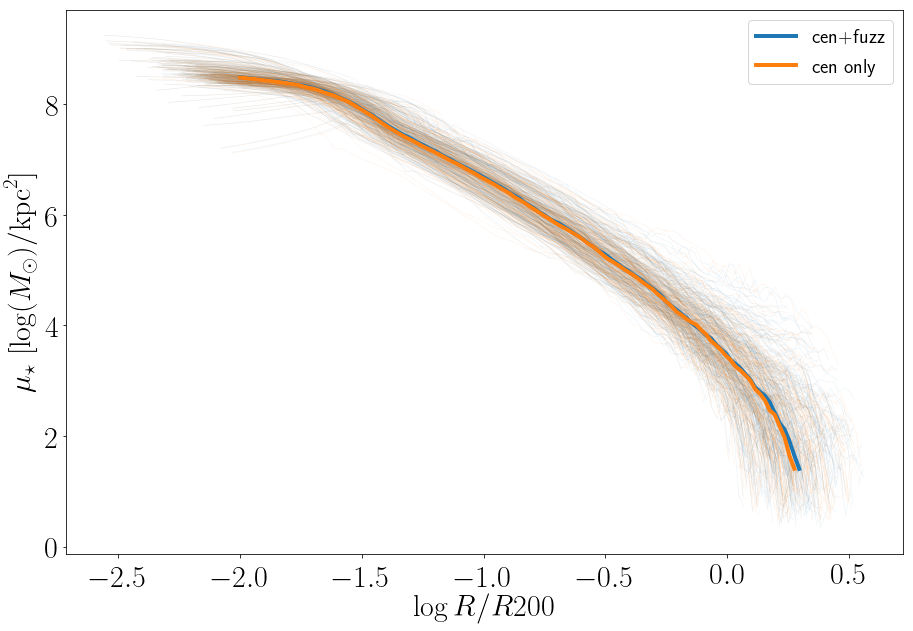

In [29]:
ngals1=0

#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()


######################################################################################################################
# plot
######################################################################################################################
for iso in tng_isos_cenICL:   
    
        r200 = R200[ngals1]
        ngals1+=1

        #tng_isos1.append(iso)

        ax1.plot(np.log10((iso['sma'] * pixel_scale)/r200),
             np.log10(iso['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0) , linewidth=0.5, c=u'#1f77b4', alpha=0.1, 
                 label='_nolegend_', zorder=1)
                 #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))


## median profiles for tng
median_sma1, median_mu1 = get_median_profile(tng_isos_cenICL, pixel_scale = pixel_scale, R200=R200)
ax1.plot(median_sma1, median_mu1+ np.log10(0.7 ** 2.0), linewidth=4.0, c=u'#1f77b4', alpha=1,
         label='cen+fuzz', zorder=8)


print ngals1

ngals1 = 0

#central only
for iso in tng_isos:   
    
        r200 = R200[ngals1]
        ngals1+=1

        #tng_isos1.append(iso)

        ax1.plot(np.log10((iso['sma'] * pixel_scale)/r200),
             np.log10(iso['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0) , linewidth=0.5, c=u'#ff7f0e', alpha=0.1, 
                 label='_nolegend_', zorder=1)
                 #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))


## median profiles for tng
median_sma1, median_mu1 = get_median_profile(tng_isos, pixel_scale = pixel_scale, rmax=800.**0.25, R200=R200)
ax1.plot(median_sma1, median_mu1+ np.log10(0.7 ** 2.0), linewidth=4.0, c=u'#ff7f0e', alpha=1,
         label='cen only', zorder=8)



######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
# ax1.set_xlim(0.9, 6)
#ax1.set_ylim(-2, 10)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
# x1, x2 = ax1.get_xlim()
# ax1_twin = ax1.twiny()
# ax1_twin.set_xlim(x1, x2)
# ax1_twin.figure.canvas.draw()
# ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25, 500**0.25, 800**0.25, 1000**0.25])
# ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300, 500, 800, 1000])
# ax1_twin.tick_params(axis='both', which='major', labelsize=15)
# ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
# ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_xlabel(r'$\log {R/R200} $', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
# ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
# ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
# ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_tng.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

## Separate by halo mass

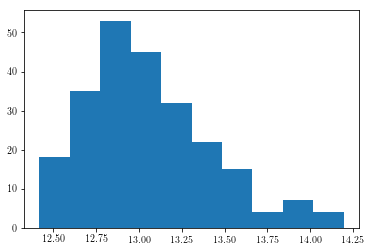

In [16]:
plt.hist(np.log10(M200))
plt.show()

In [19]:
np.linspace(min(np.log10(M200)), max(np.log10(M200)),4)

array([12.41803052, 13.01095682, 13.60388312, 14.19680941])

In [ ]:
from matplotlib import cm, colors
minima = min(np.log10(M200))
maxima = max(np.log10(M200))

norm = colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.viridis)

/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:36: RuntimeWarning: divide by zero encountered in log10


235


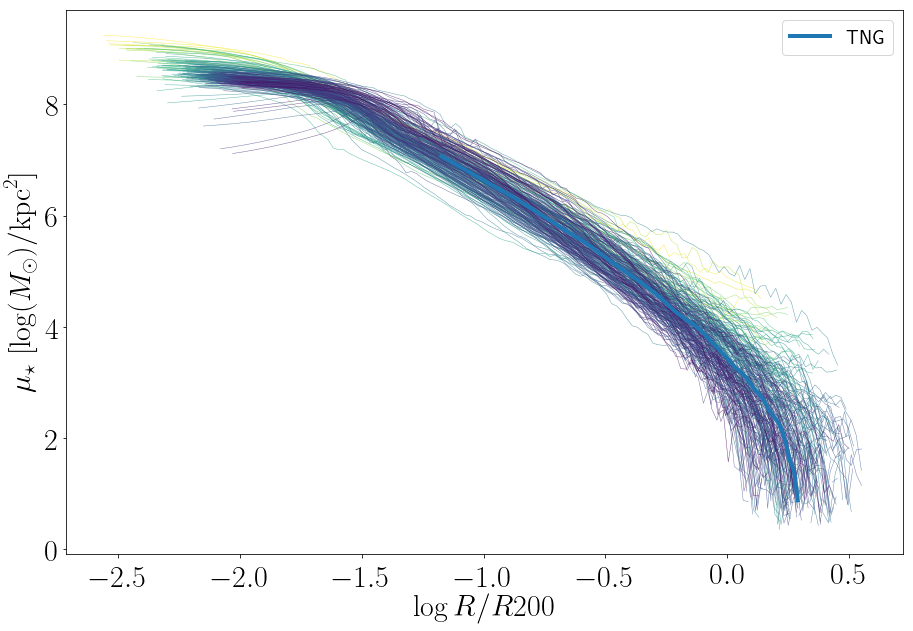

In [30]:
ngals1=0

#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()


######################################################################################################################
# plot
######################################################################################################################
for iso in tng_isos:   
    
        r200 = R200[ngals1]
#         if np.log10(M200[ngals1])<13:
#             color = 'b'
#         elif np.log10(M200[ngals1])>13:
#             if np.log10(M200[ngals1])>13.6:
#                 color = 'r'
#             else:
#                 color = 'g'
        color = mapper.to_rgba(np.log10(M200[ngals1]))   
        ngals1+=1

        #tng_isos1.append(iso)
        

        ax1.plot(np.log10((iso['sma'] * pixel_scale)/r200),
             np.log10(iso['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0) , linewidth=0.5, c=color,
                 alpha=0.7, label='_nolegend_', zorder=1)
                 #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))


## median profiles for tng
median_sma1, median_mu1 = get_median_profile(tng_isos, pixel_scale = pixel_scale, rmax=800.**0.25, R200=R200)

ax1.plot(np.log10(median_sma1), median_mu1+ np.log10(0.7 ** 2.0), linewidth=4.0, c=u'#1f77b4', alpha=1, label='TNG', zorder=8)


print ngals1


######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
# ax1.set_xlim(0.9, 6)
#ax1.set_ylim(-2, 10)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
# x1, x2 = ax1.get_xlim()
# ax1_twin = ax1.twiny()
# ax1_twin.set_xlim(x1, x2)
# ax1_twin.figure.canvas.draw()
# ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25, 500**0.25, 800**0.25, 1000**0.25])
# ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300, 500, 800, 1000])
# ax1_twin.tick_params(axis='both', which='major', labelsize=15)
# ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
# ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_xlabel(r'$\log {R/R200} $', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
# ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
# ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
# ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_tng.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

In [33]:
np.linspace(min(np.log10(M200)), max(np.log10(M200)),4)

array([12.41803052, 13.01095682, 13.60388312, 14.19680941])

985.7152106596405
960.4673925876936
924.6488147189252
940.7457980001044
792.3118991247927
847.9943718572567
812.7245338076369
850.5239706605803
799.6096086752439
794.0978848485079
719.6120594348411
760.5658530702916
746.971548322683
641.129147306004
718.6636389689871
669.893793488669
646.6565453894157
651.1777938760677
639.3292348208794
625.3983908023583


/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:50: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log10


235


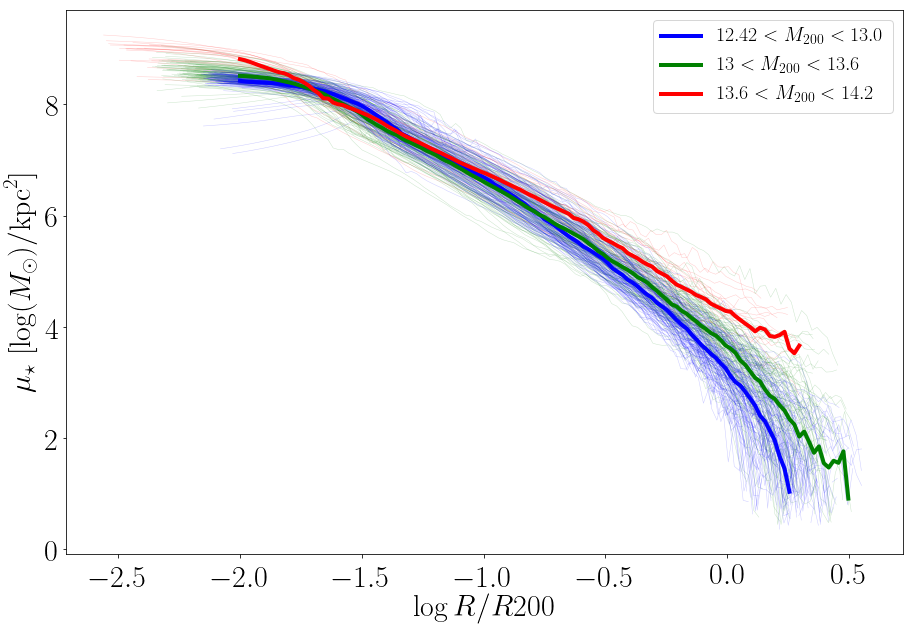

In [71]:
ngals1=0

#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

lowM_isos = []
lowM_R200 = []

midM_isos = []
midM_R200 = []

highM_isos = []
highM_R200 = []
######################################################################################################################
# plot
######################################################################################################################
for iso in tng_isos:   
    
        r200 = R200[ngals1]
        log_m200 = np.log10(M200[ngals1])
        
        if log_m200<13:
            color = 'b'
            
            lowM_isos.append(iso)
            lowM_R200.append(r200)

        elif log_m200>13:
            if log_m200>13.6:
                color = 'r'
                print(r200)
                
                highM_isos.append(iso)
                highM_R200.append(r200)
            else:
                color = 'g'
                
                
                midM_isos.append(iso)
                midM_R200.append(r200)
                
#         color = mapper.to_rgba(np.log10(M200[ngals1]))   
        ngals1+=1

        #tng_isos1.append(iso)
        

        ax1.plot(np.log10((iso['sma'] * pixel_scale)/r200),
             np.log10(iso['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0) , linewidth=0.5, c=color,
                 alpha=0.2, label='_nolegend_', zorder=1)
                 #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))



## median profiles for tng
# median_sma1, median_mu1 = get_median_profile(tng_isos, pixel_scale = pixel_scale, rmax=800.**0.25, R200=R200)

# ax1.plot(np.log10(median_sma1), median_mu1+ np.log10(0.7 ** 2.0), linewidth=4.0, c=u'#1f77b4', alpha=1, label='TNG', zorder=8)

median_sma_lowM, median_mu_lowM = get_median_profile(lowM_isos, pixel_scale = pixel_scale, R200=lowM_R200)
median_sma_midM, median_mu_midM = get_median_profile(midM_isos, pixel_scale = pixel_scale, R200=midM_R200)
median_sma_highM, median_mu_highM = get_median_profile(highM_isos, pixel_scale = pixel_scale, R200=highM_R200)

ax1.plot(median_sma_lowM, median_mu_lowM+ np.log10(0.7 ** 2.0), linewidth=4.0, c='b', alpha=1,
         label=r'$12.42<M_{200}<13.0$', zorder=8)
ax1.plot(median_sma_midM, median_mu_midM+ np.log10(0.7 ** 2.0), linewidth=4.0, c='g', alpha=1,
         label=r'$13<M_{200}<13.6$', zorder=8)
ax1.plot(median_sma_highM, median_mu_highM+ np.log10(0.7 ** 2.0), linewidth=4.0, c='r', alpha=1,
         label=r'$13.6<M_{200}<14.2$', zorder=8)



print ngals1


######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
# ax1.set_xlim(0.9, 6)
#ax1.set_ylim(-2, 10)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
# x1, x2 = ax1.get_xlim()
# ax1_twin = ax1.twiny()
# ax1_twin.set_xlim(x1, x2)
# ax1_twin.figure.canvas.draw()
# ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25, 500**0.25, 800**0.25, 1000**0.25])
# ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300, 500, 800, 1000])
# ax1_twin.tick_params(axis='both', which='major', labelsize=15)
# ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
# ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_xlabel(r'$\log {R/R200} $', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
# ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
# ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
# ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_tng.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

## try to cut outer and inner parts 

In [44]:
def smooth_iso(iso, r200, min_kpc=10, max_kpc=750, n_bins=100):
    
    kpc_bins = np.logspace(np.log10(min_kpc/r200), np.log10(max_kpc/r200), n_bins)*r200
    
    smoothed_intens = interp1d(iso['sma_kpc'], np.log10(iso['intens'] / (pixel_scale ** 2)),
                             bounds_error=False, 
                             fill_value=np.nan, 
                             kind='slinear')(kpc_bins)
    
    return kpc_bins, smoothed_intens

def get_median_smoothed_profile(bins, mus, pixel_scale, R200):
    
    sma_common = np.linspace(-2, 1, nbin)
    
    mu = np.nanmedian(np.stack([interp1d(np.log10(bin/r200), 
                                         mu,
                                         bounds_error=False, 
                                         fill_value=np.nan, 
                                         kind='slinear')(sma_common) 
                                 for bin,mu,r200 in zip(bins,mus, R200)]), axis=0)  
    
    return sma_common, mu

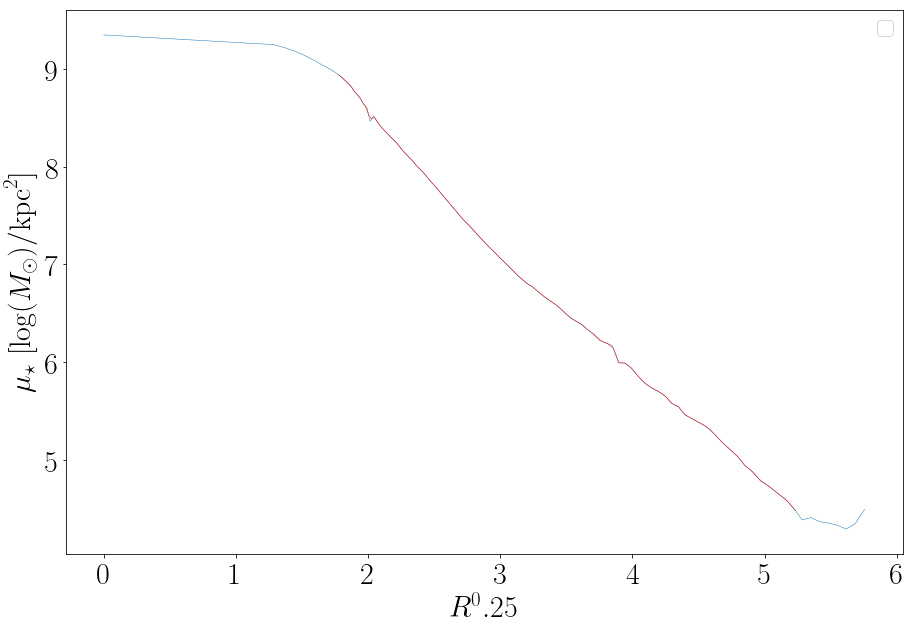

In [77]:
bins = np.linspace(10,750,20)
bins = np.logspace(-1.5,0.5,100)*r200
ngals1=0

#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

iso = tng_isos[0]
kpc_bins, smoothed_iso = smooth_iso(iso, r200)
######################################################################################################################
# plot
######################################################################################################################
# ax1.plot(np.log10((iso['sma'] * pixel_scale)/r200),
#              np.log10(iso['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0) , linewidth=0.5, c=color,
#                  alpha=0.2, label='_nolegend_', zorder=1)
ax1.plot((iso['sma'] * pixel_scale) ** 0.25,
             np.log10(iso['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0) , linewidth=0.5, c=u'#1f77b4',
                 alpha=1, label='_nolegend_', zorder=1)

ax1.plot((kpc_bins) ** 0.25,
             smoothed_iso + np.log10(0.7 ** 2.0) , linewidth=0.5, c='r',
                 alpha=1, label='_nolegend_', zorder=1)
######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
# ax1.set_xlim(0.9, 6)
#ax1.set_ylim(-2, 10)

ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)



######################################################################################################################

#axis labels and vertical lines
# ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_xlabel(r'$ {R^0.25} $', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
# ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
# ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
# ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_tng.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log10


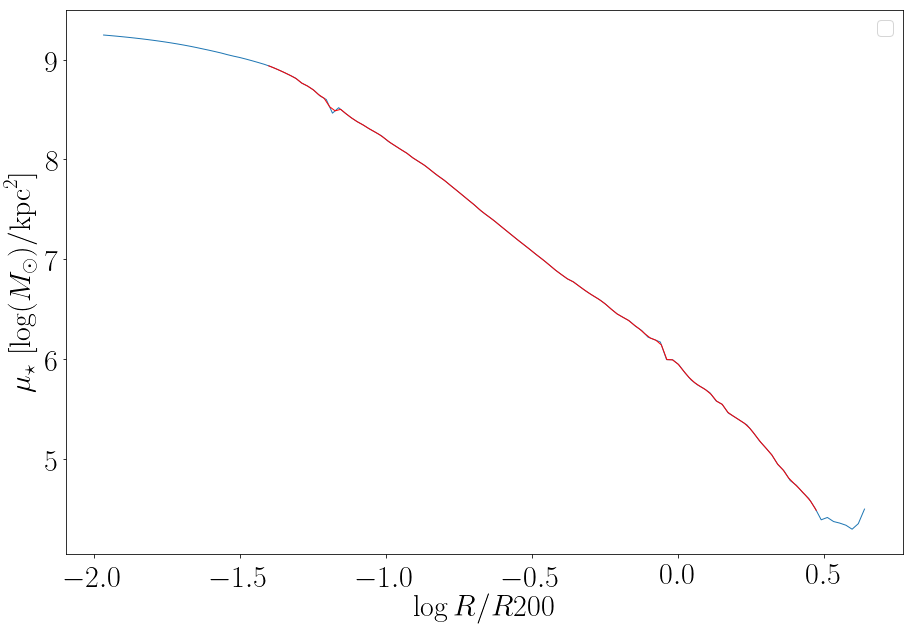

In [78]:
bins = np.linspace(10,750,100)
bins = np.logspace(-1.5,0.5,100)*r200
ngals1=0

#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()


iso = tng_isos[0]
kpc_bins, smoothed_iso = smooth_iso(iso, r200)
######################################################################################################################
# plot
######################################################################################################################
ax1.plot(np.log10((iso['sma'] * pixel_scale)/r200),
             np.log10(iso['intens'] / (pixel_scale**2.0))+ np.log10(0.7 ** 2.0) , linewidth=1,
                 alpha=1, label='_nolegend_', zorder=1)
ax1.plot(np.log10((kpc_bins)/r200),
             smoothed_iso+ np.log10(0.7 ** 2.0) , linewidth=1, c='r',
                 alpha=1, label='_nolegend_', zorder=1)
######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
# ax1.set_xlim(0.9, 6)
#ax1.set_ylim(-2, 10)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
# x1, x2 = ax1.get_xlim()
# ax1_twin = ax1.twiny()
# ax1_twin.set_xlim(x1, x2)
# ax1_twin.figure.canvas.draw()
# ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25, 500**0.25, 800**0.25, 1000**0.25])
# ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300, 500, 800, 1000])
# ax1_twin.tick_params(axis='both', which='major', labelsize=15)
# ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
# ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_xlabel(r'$\log {R/R200} $', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
# ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
# ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
# ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_tng.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


235


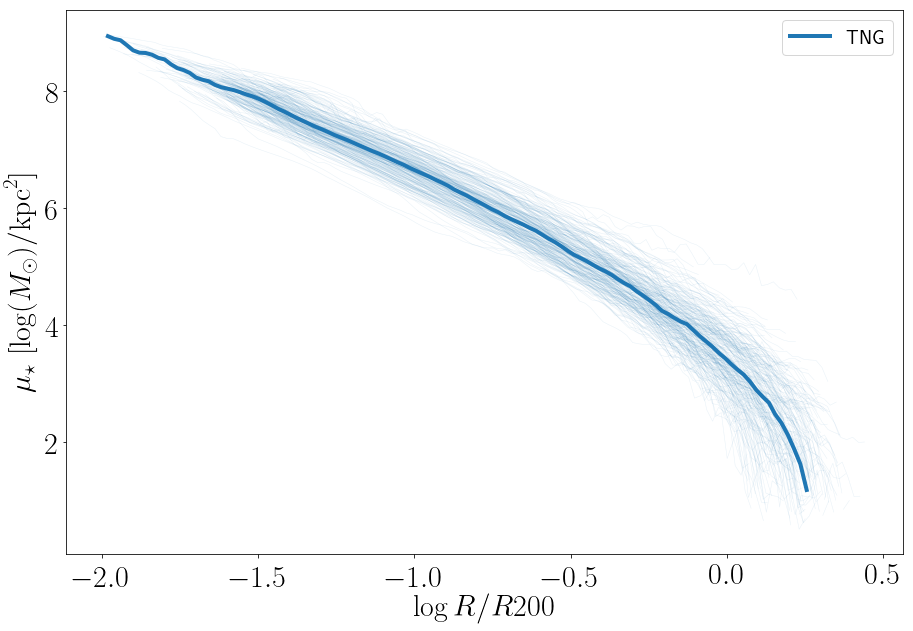

In [89]:
ngals1=0

#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

bins = []
mus = []
######################################################################################################################
# plot
######################################################################################################################
for iso in tng_isos:   
    
        r200 = R200[ngals1]
        ngals1+=1

        #tng_isos1.append(iso)
        
        kpc_bins, smoothed_iso = smooth_iso(iso, r200)
        bins.append(kpc_bins)
        mus.append(smoothed_iso)
        
        ax1.plot(np.log10((kpc_bins)/r200),
             smoothed_iso + np.log10(0.7 ** 2.0) , linewidth=0.5, c=u'#1f77b4', alpha=0.1, 
                 label='_nolegend_', zorder=1)
                 #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))


## median profiles for tng
median_sma1, median_mu1 = get_median_smoothed_profile(bins, mus, pixel_scale, R200)

ax1.plot(median_sma1, median_mu1+ np.log10(0.7 ** 2.0), linewidth=4.0, c=u'#1f77b4', alpha=1, label='TNG', zorder=8)


print ngals1


######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
# ax1.set_xlim(0.9, 6)
#ax1.set_ylim(-2, 10)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

######################################################################################################################

#axis labels and vertical lines
# ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_xlabel(r'$\log {R/R200} $', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
# ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
# ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
# ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_tng.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


235


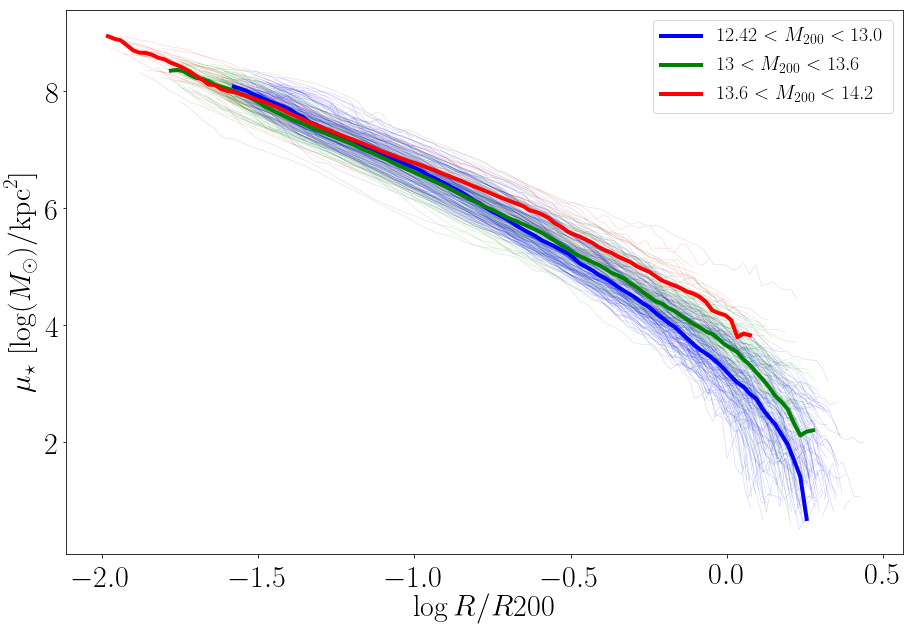

In [94]:
ngals1=0

#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

lowM_isos = []
lowM_R200 = []
lowM_bins = []

midM_isos = []
midM_R200 = []
midM_bins = []

highM_isos = []
highM_R200 = []
highM_bins = []
######################################################################################################################
# plot
######################################################################################################################
for iso in tng_isos:   
    
        r200 = R200[ngals1]
        log_m200 = np.log10(M200[ngals1])
        
        kpc_bins, smoothed_iso = smooth_iso(iso, r200)
        
        if log_m200<13:
            color = 'b'
            
            lowM_isos.append(smoothed_iso)
            lowM_R200.append(r200)
            lowM_bins.append(kpc_bins)
            

        elif log_m200>13:
            if log_m200>13.6:
                color = 'r'
                
                highM_isos.append(smoothed_iso)
                highM_R200.append(r200)
                highM_bins.append(kpc_bins)
            else:
                color = 'g'
                
                
                midM_isos.append(smoothed_iso)
                midM_R200.append(r200)
                midM_bins.append(kpc_bins)
                
#         color = mapper.to_rgba(np.log10(M200[ngals1]))   
        ngals1+=1

        #tng_isos1.append(iso)
        
        
        ax1.plot(np.log10((kpc_bins)/r200),
             smoothed_iso + np.log10(0.7 ** 2.0), linewidth=0.5, c=color,
                 alpha=0.2, label='_nolegend_', zorder=1)
                 #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))



## median profiles for tng
# median_sma1, median_mu1 = get_median_profile(tng_isos, pixel_scale = pixel_scale, rmax=800.**0.25, R200=R200)

# ax1.plot(np.log10(median_sma1), median_mu1+ np.log10(0.7 ** 2.0), linewidth=4.0, c=u'#1f77b4', alpha=1, label='TNG', zorder=8)
median_sma1, median_mu1 = get_median_smoothed_profile(bins, mus, pixel_scale, R200)

median_sma_lowM, median_mu_lowM = get_median_smoothed_profile(lowM_bins, lowM_isos, pixel_scale, lowM_R200)
median_sma_midM, median_mu_midM = get_median_smoothed_profile(midM_bins, midM_isos, pixel_scale, midM_R200)
median_sma_highM, median_mu_highM = get_median_smoothed_profile(highM_bins, highM_isos, pixel_scale, highM_R200)

ax1.plot(median_sma_lowM, median_mu_lowM+ np.log10(0.7 ** 2.0), linewidth=4.0, c='b', alpha=1,
         label=r'$12.42<M_{200}<13.0$', zorder=8)
ax1.plot(median_sma_midM, median_mu_midM+ np.log10(0.7 ** 2.0), linewidth=4.0, c='g', alpha=1,
         label=r'$13<M_{200}<13.6$', zorder=8)
ax1.plot(median_sma_highM, median_mu_highM+ np.log10(0.7 ** 2.0), linewidth=4.0, c='r', alpha=1,
         label=r'$13.6<M_{200}<14.2$', zorder=8)



print ngals1


######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
# ax1.set_xlim(0.9, 6)
#ax1.set_ylim(-2, 10)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
# x1, x2 = ax1.get_xlim()
# ax1_twin = ax1.twiny()
# ax1_twin.set_xlim(x1, x2)
# ax1_twin.figure.canvas.draw()
# ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25, 500**0.25, 800**0.25, 1000**0.25])
# ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300, 500, 800, 1000])
# ax1_twin.tick_params(axis='both', which='major', labelsize=15)
# ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
# ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_xlabel(r'$\log {R/R200} $', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
# ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
# ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
# ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_tng.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


2703
235


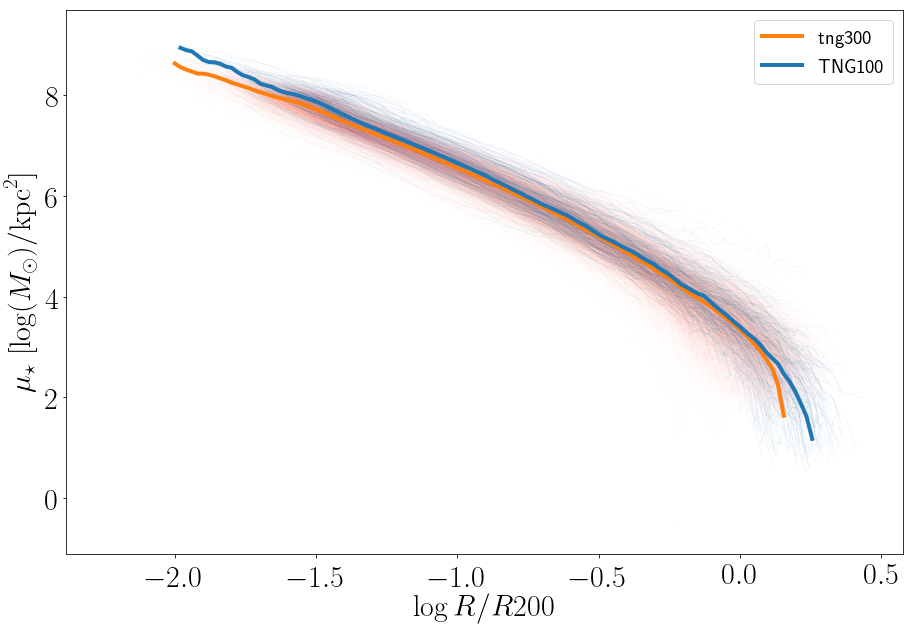

In [53]:

#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

ngals1=0
bins = []
mus = []
######################################################################################################################
# plot
######################################################################################################################
for iso in tng300_isos:   
    
        r200 = TNG300_R200[ngals1]
        ngals1+=1

        #tng300_isos1.append(iso)
        
        kpc_bins, smoothed_iso = smooth_iso(iso, r200)
        bins.append(kpc_bins)
        mus.append(smoothed_iso)
        
        ax1.plot(np.log10((kpc_bins)/r200),
             smoothed_iso + np.log10(0.7 ** 2.0) , linewidth=0.05, c=u'#ff7f0e', alpha=0.1, 
                 label='_nolegend_', zorder=1)
                 #label='tng300 Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))


## median profiles for tng300
median_sma1, median_mu1 = get_median_smoothed_profile(bins, mus, pixel_scale, TNG300_R200)

ax1.plot(median_sma1, median_mu1+ np.log10(0.7 ** 2.0), linewidth=4.0, c=u'#ff7f0e', alpha=1, label='tng300', zorder=8)


print ngals1

#TNG100
ngals1=0
bins = []
mus = []
######################################################################################################################
# plot
######################################################################################################################
for iso in tng_isos:   
    
        r200 = R200[ngals1]
        ngals1+=1

        #tng_isos1.append(iso)
        
        kpc_bins, smoothed_iso = smooth_iso(iso, r200)
        bins.append(kpc_bins)
        mus.append(smoothed_iso)
        
        ax1.plot(np.log10((kpc_bins)/r200),
             smoothed_iso + np.log10(0.7 ** 2.0) , linewidth=0.5, c=u'#1f77b4', alpha=0.1, 
                 label='_nolegend_', zorder=1)
                 #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))


## median profiles for tng
median_sma1, median_mu1 = get_median_smoothed_profile(bins, mus, pixel_scale, R200)

ax1.plot(median_sma1, median_mu1+ np.log10(0.7 ** 2.0), linewidth=4.0, c=u'#1f77b4', alpha=1, label='TNG100', zorder=8)


print ngals1
######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
# ax1.set_xlim(0.9, 6)
#ax1.set_ylim(-2, 10)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

ax1.legend(fontsize=20)

######################################################################################################################

#axis labels and vertical lines
# ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_xlabel(r'$\log {R/R200} $', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
# ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
# ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
# ax1.axvline(800.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_tng300.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()